In [1]:
# Necessary imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import glob
import re
from IPython.core.display import display, HTML
from IPython.display import Image 
from IPython.core.display import HTML 
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

print('Libraries imported!')

Libraries imported!


In [2]:
# path = r'C:/Metis_Bootcamp/Cocktails_recommendation_NLP/data/reviews_photos/' # data path
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     data = pd.read_csv(filename, index_col=0, header=0)
#     li.append(data)

# df = pd.concat(li, axis=0, ignore_index=True)

# print(df.shape)

# df.head()

In [3]:
#df.to_csv('reviews_photos.csv')

In [4]:
df = pd.read_csv('../data/main_reviews.csv', index_col=0)
df.shape

(10522, 17)

In [5]:
df_2 = pd.read_csv('../data/reviews_photos.csv', index_col=0)
df_2.shape

(10522, 5)

### df_1

In [6]:
def numerical_extraction(df):
    
    #Take only numbers for the points
    for _ in range(len(df)):
        try:
            df.Points[_] = df.Points[_].split(" ")[0]
        except:
            pass

    #Convert it to int64
    try:
        df.Points = pd.to_numeric(df.Points, errors='coerce').fillna(0).astype(np.int64)
    except:
        pass


    #Replace 0 by nan since nan does not mean 0 point
    for _ in range(len(df)):
        if df.Points[_] == 0:
            df.Points[_] = np.nan
        else:
            pass

    #Do the same thing for Price
    for _ in range(len(df)):
        try:
            df.Price[_] = df.Price[_].split("$")[1]
        except:
            pass

    try:
        df.Price = pd.to_numeric(df.Price, errors='coerce').fillna(0).astype(np.int64)
    except:
        pass


    for _ in range(len(df)):
        if df.Price[_] == 0:
            df.Price[_] = np.nan
        else:
            pass
    
    return df

In [7]:
numerical_extraction(df)

,Name,Description,Category,Country,Alcohol_Vol,Review,Style,Aroma,Flavor,Sweetness,Bitterness,Enjoy,Pairing,Cocktails,Bottom_Line,Points,Price
0,Mezcal de Leyendas Verde San Luis Potosi Mezca...,Mezcal de Leyendas Review Verde San Luis Potos...,Blanco Mezcal,Mexico,45%,"Clear color. Aromas and flavors of cucumber, m...","Fruity, Funky, Rich, Spicy, Smoky, Herbal & Co...","cucumber-melon, lime spritz, caramelized orang...","Same as aromas with notes of pickled ginger, s...",NaN,NaN,"in cocktails, on the rocks and neat",NaN,"Paloma, Sangrita, Tommy's Margarita","A sweet, savory, salty, juicy display of compl...",97.0,49.0
1,El Tesoro Paradiso Tequila Extra Anejo Mexico ...,El Tesoro Review Paradiso Tequila Extra Anejo ...,Extra Añejo Tequila,Mexico,40%,"Gold color. Inviting aromas of roasted nuts, c...","Fruity, Complex, Candied, Herbal, Rich & Spicy","roasted nuts, candied cherries, vanilla bean, ...","ripe melons, toffee, and white pepper",NaN,NaN,"in cocktails, neat, on the rocks and with cigars",NaN,"Paloma, Sangrita, Tommy's Margarita",A tantalizing melange of complex flavors that ...,97.0,180.0
2,Peloton de la Muerte Vegan Pechuga Mezcal Mexi...,Peloton de la Muerte Review Vegan Pechuga Mezc...,Flavored Mezcal,Mexico,45.10%,Silvery straw color. Citrusy aromas and flavor...,"Complex, Fruity & Herbal","pickled melon and pineapple, candied jalapeño,...",Same as aromas with suggestions of curry,NaN,NaN,"in cocktails, neat and on the rocks",NaN,"Paloma, Sangrita, Tommy's Margarita","A joyous, extroverted Mezcal with juicy fruit ...",96.0,44.0
3,El Tesoro Anejo Tequila Mexico Spirits Review ...,El Tesoro Review Anejo Tequila Mexico Mexican ...,Añejo Tequila,Mexico,40%,Straw color. Inviting aromas and flavors of ho...,"Fruity, Spicy & Herbal","honey-drizzled grapefruit, sweet apple compote...","Same as aromas with notes of pink peppercorns,...",NaN,NaN,"in cocktails, neat and on the rocks",NaN,"Paloma, Sangrita, Tommy's Margarita","A stylish, peppery tequila with an authentic v...",96.0,85.0
4,1800 Milenio Extra Anejo Tequila Mexico Spirit...,1800 Review Milenio Extra Anejo Tequila Mexico...,Extra Añejo Tequila,Mexico,40%,"Amber color. Aromas of toffee coated popcorn, ...","Fruity, Rich & Spicy","toffee coated popcorn, peanuts, warm madeira c...","allspice, mint tea, candied ginger, honey, and...",NaN,NaN,neat and on the rocks,NaN,NaN,A richly flavored Extra Añejo Tequila with an ...,96.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10517,Angry Orchard Super Natural Cider USA Cider Re...,Angry Orchard Review Super Natural Cider MA Ma...,Specialty Cider,USA,7.60%,Straw green color. Aromas of apple cider vineg...,Funky,"apple cider vinegar, new sneakers, and mango pits",wild lemon and grapefruit pith,Dry,NaN,with food,"Chicken Fajitas, Chicken Kebobs, BBQ Chicken",NaN,"A bone dry, adventurous cider for kombucha lov...",NaN,NaN
10518,Avid Cider Co Apricot Cider USA Cider Review |...,Avid Cider Review Apricot Cider OR Oregon USA ...,Fruit Cider,USA,6.20%,"Light gold color. Aromas of orange creamsicle,...",Sweet & Fruity & Funky,"orange creamsicle, apple juice, melons in crea...",yogurt with apple cereal,Fruity,NaN,Enjoy on its own,"Pork Chops, Cobb Salad, Chicken Caesar Salad",NaN,"A sweet, subtle apple-y refresher.",NaN,NaN
10519,Magnotta Craft Ciders Apple Flavored Cider Can...,Magnotta Craft Ciders Review Apple Flavored Ci...,Common Cider,Canada,5.60%,"Silvery straw color. Aromas of pinot grigio, p...",Crisp & Light & Sweet & Fruity,"pinot grigio, pear slices, nougat, and brown rice",fondant and diced apples in powdered sugar,Very Sweet,NaN,on its own and with food,"Buffalo Chicken Sandwich, Sweet & Sour Pork, G...",NaN,Pear notes shine in this cider that is sure to...,NaN,NaN
10520,Topa Brut Artisanal Cidre France Cider Review ...,Topa Review Brut Artisanal Cidre France French...,French Cider,France,5.50%,Gold color. Aromas and flavors of frosted cere...,Crisp & Light & Funky,"frosted cereal, rais

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10522 entries, 0 to 10521
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         10517 non-null  object 
 1   Description  10517 non-null  object 
 2   Category     9467 non-null   object 
 3   Country      9461 non-null   object 
 4   Alcohol_Vol  9467 non-null   object 
 5   Review       9467 non-null   object 
 6   Style        9406 non-null   object 
 7   Aroma        9429 non-null   object 
 8   Flavor       9427 non-null   object 
 9   Sweetness    6927 non-null   object 
 10  Bitterness   473 non-null    object 
 11  Enjoy        9429 non-null   object 
 12  Pairing      7171 non-null   object 
 13  Cocktails    1643 non-null   object 
 14  Bottom_Line  9467 non-null   object 
 15  Points       7949 non-null   float64
 16  Price        8577 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.7+ MB


In [9]:
df['Points_Ranking'] = np.nan

for i in range(len(df)):
    
    if df.Points[i] > 94:
        df['Points_Ranking'][i] = 'High'
    
    elif df.Points[i] >= 89:
        df['Points_Ranking'][i] = 'Medium'
        
    elif df.Points[i] < 89:
        df['Points_Ranking'][i] = 'Low'
        
    else:
        pass

print(df.Points_Ranking.value_counts())

df['Price_Range'] = np.nan

for i in range(len(df)):
    
    if df.Price[i] > 70:
        df['Price_Range'][i] = 'Expensive'
    
    elif df.Price[i] >= 20:
        df['Price_Range'][i] = 'Medium'
        
    elif df.Price[i] < 20:
        df['Price_Range'][i] = 'Cheap'
        
    else:
        pass
print(df.Price_Range.value_counts())

Low       3901
Medium    3839
High       209
Name: Points_Ranking, dtype: int64
Cheap        4481
Medium       3653
Expensive     443
Name: Price_Range, dtype: int64


In [11]:
for i in range(len(df)):
    
    try:
        df['Name'][i] = df['Name'][i].split(' Review')[0]
    except:
        pass
    
df.shape

(10522, 19)

In [12]:
df.drop_duplicates(subset='Name', keep="last", inplace=True)

df = df[df['Name'].notna()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8319 entries, 0 to 10521
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            8319 non-null   object 
 1   Description     8319 non-null   object 
 2   Category        7322 non-null   object 
 3   Country         7317 non-null   object 
 4   Alcohol_Vol     7322 non-null   object 
 5   Review          7322 non-null   object 
 6   Style           7286 non-null   object 
 7   Aroma           7303 non-null   object 
 8   Flavor          7301 non-null   object 
 9   Sweetness       5225 non-null   object 
 10  Bitterness      438 non-null    object 
 11  Enjoy           7303 non-null   object 
 12  Pairing         5509 non-null   object 
 13  Cocktails       1315 non-null   object 
 14  Bottom_Line     7322 non-null   object 
 15  Points          6224 non-null   float64
 16  Price           6554 non-null   float64
 17  Points_Ranking  6224 non-null   

### df_2

In [41]:
df_2 = pd.read_csv('../data/reviews_photos.csv', index_col=0)
df_2.shape

(10522, 5)

In [42]:
for i in range(len(df_2)):
    
    try:
        df_2['Name'][i] = df_2['Name'][i].split(' Review')[0]
    except:
        pass
    
df_2.shape

(10522, 5)

In [50]:
df_2["Medal_Rank"] = np.nan
for i in range(len(df_2)):
    
    if df_2.Medal[i] == 'Platinum Medal':
        df_2.Medal_Rank[i] = 5
    
    elif df_2.Medal[i] == 'Gold Medal':
        df_2.Medal_Rank[i] = 4
        
    elif df_2.Medal[i] == 'Silver Medal':
        df_2.Medal_Rank[i] = 3
    
    elif df_2.Medal[i] == 'Bronze Medal':
        df_2.Medal_Rank[i] = 2
    
    else:
        pass
    
df_2.head()

,Name,Extend_Review,Photo_Link,Medal,Bands,Medal_Rank
0,Mezcal de Leyendas Verde San Luis Potosi Mezca...,Blanco mezcal is a spirit from Mexico that can...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0
1,El Tesoro Paradiso Tequila Extra Anejo Mexico ...,An extra añejo tequila must be aged for at lea...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0
2,Peloton de la Muerte Vegan Pechuga Mezcal Mexi...,A Flavored Mezcal is an agave-based distillate...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0
3,El Tesoro Anejo Tequila Mexico Spirits,"Añejo (""old"") Tequila is aged in wooden barrel...",https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0
4,1800 Milenio Extra Anejo Tequila Mexico Spirits,An extra añejo tequila must be aged for at lea...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0


In [52]:
df_2["Bands_Rank"] = np.nan
for i in range(len(df_2)):
    
    if df_2.Bands[i] == 'Superlative':
        df_2.Bands_Rank[i] = 5
    
    elif df_2.Bands[i] == 'Exceptional':
        df_2.Bands_Rank[i] = 4
        
    elif df_2.Bands[i] == 'Highly Recommended':
        df_2.Bands_Rank[i] = 3
    
    elif df_2.Bands[i] == 'Recommended':
        df_2.Bands_Rank[i] = 2
    
    else:
        pass
    
df_2.head()

,Name,Extend_Review,Photo_Link,Medal,Bands,Medal_Rank,Bands_Rank
0,Mezcal de Leyendas Verde San Luis Potosi Mezca...,Blanco mezcal is a spirit from Mexico that can...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0
1,El Tesoro Paradiso Tequila Extra Anejo Mexico ...,An extra añejo tequila must be aged for at lea...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0
2,Peloton de la Muerte Vegan Pechuga Mezcal Mexi...,A Flavored Mezcal is an agave-based distillate...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0
3,El Tesoro Anejo Tequila Mexico Spirits,"Añejo (""old"") Tequila is aged in wooden barrel...",https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0
4,1800 Milenio Extra Anejo Tequila Mexico Spirits,An extra añejo tequila must be aged for at lea...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0


In [55]:
df_2.shape

(10522, 7)

In [56]:
df_2.drop_duplicates(subset='Name', keep="last", inplace=True)

df_2 = df_2[df_2['Name'].notna()]

df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8319 entries, 0 to 10521
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           8319 non-null   object 
 1   Extend_Review  7279 non-null   object 
 2   Photo_Link     7289 non-null   object 
 3   Medal          7289 non-null   object 
 4   Bands          7289 non-null   object 
 5   Medal_Rank     7289 non-null   float64
 6   Bands_Rank     7289 non-null   float64
dtypes: float64(2), object(5)
memory usage: 519.9+ KB


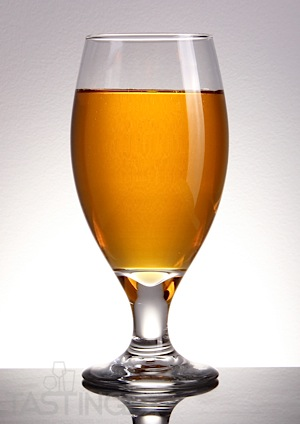

In [33]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
Image(df_2.Photo_Link[8990], width=127, height=228)

In [58]:
df.shape

(8319, 19)

In [59]:
df_2.shape

(8319, 7)

In [63]:
cleaned_df = df.merge(df_2, on='Name')

In [66]:
cleaned_df.to_csv('cleaned_data.csv')

In [149]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8319 entries, 0 to 8318
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            8319 non-null   object 
 1   Description     8319 non-null   object 
 2   Category        7322 non-null   object 
 3   Country         7317 non-null   object 
 4   Alcohol_Vol     7322 non-null   object 
 5   Review          7322 non-null   object 
 6   Style           7286 non-null   object 
 7   Aroma           7303 non-null   object 
 8   Flavor          7301 non-null   object 
 9   Sweetness       5225 non-null   object 
 10  Bitterness      438 non-null    object 
 11  Enjoy           7303 non-null   object 
 12  Pairing         5509 non-null   object 
 13  Cocktails       1315 non-null   object 
 14  Bottom_Line     7322 non-null   object 
 15  Points          6224 non-null   float64
 16  Price           6554 non-null   float64
 17  Points_Ranking  6224 non-null   o

In [158]:
cleaned_df['Full_Review'] = cleaned_df['Review'] + '. ' + cleaned_df['Extend_Review']

In [189]:
cleaned_df['Tasting_Info'] = cleaned_df['Style'].fillna('') + ' | ' + cleaned_df['Aroma'].fillna('') + ' | ' + cleaned_df['Flavor'].fillna('') + ' | ' + cleaned_df['Sweetness'].fillna('')  + '|' + cleaned_df['Bitterness'].fillna('') + '|' + cleaned_df['Enjoy'].fillna('') + '|' + cleaned_df['Pairing'].fillna('') + '|' + cleaned_df['Cocktails'].fillna('') + '|' + cleaned_df['Bottom_Line'].fillna('')

In [193]:
cleaned_df.Tasting_Info[4312]

'Quaffable | dried lemon, green apple, grapefruit juice, and quince | Same as aromas with accents of toasted cashew | Dry-yet-Fruity||Now on its own|BBQ Chicken, Pad Thai Chicken, Chicken Fajitas||A crisp quaffer to serve with a good chill.'

In [191]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8319 entries, 0 to 8318
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            8319 non-null   object 
 1   Description     8319 non-null   object 
 2   Category        7322 non-null   object 
 3   Country         7317 non-null   object 
 4   Alcohol_Vol     7322 non-null   object 
 5   Review          7322 non-null   object 
 6   Style           7286 non-null   object 
 7   Aroma           7303 non-null   object 
 8   Flavor          7301 non-null   object 
 9   Sweetness       5225 non-null   object 
 10  Bitterness      438 non-null    object 
 11  Enjoy           7303 non-null   object 
 12  Pairing         5509 non-null   object 
 13  Cocktails       1315 non-null   object 
 14  Bottom_Line     7322 non-null   object 
 15  Points          6224 non-null   float64
 16  Price           6554 non-null   float64
 17  Points_Ranking  6224 non-null   o

In [194]:
cleaned_df.head()

,Name,Description,Category,Country,Alcohol_Vol,Review,Style,Aroma,Flavor,Sweetness,...,Points_Ranking,Price_Range,Extend_Review,Photo_Link,Medal,Bands,Medal_Rank,Bands_Rank,Full_Review,Tasting_Info
0,Mezcal de Leyendas Verde San Luis Potosi Mezca...,Mezcal de Leyendas Review Verde San Luis Potos...,Blanco Mezcal,Mexico,45%,"Clear color. Aromas and flavors of cucumber, m...","Fruity, Funky, Rich, Spicy, Smoky, Herbal & Co...","cucumber-melon, lime spritz, caramelized orang...","Same as aromas with notes of pickled ginger, s...",NaN,...,High,Medium,Blanco mezcal is a spirit from Mexico that can...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0,"Clear color. Aromas and flavors of cucumber, m...","Fruity, Funky, Rich, Spicy, Smoky, Herbal & Co..."
1,El Tesoro Paradiso Tequila Extra Anejo Mexico ...,El Tesoro Review Paradiso Tequila Extra Anejo ...,Extra Añejo Tequila,Mexico,40%,"Gold color. Inviting aromas of roasted nuts, c...","Fruity, Complex, Candied, Herbal, Rich & Spicy","roasted nuts, candied cherries, vanilla bean, ...","ripe melons, toffee, and white pepper",NaN,...,High,Expensive,An extra añejo tequila must be aged for at lea...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0,"Gold color. Inviting aromas of roasted nuts, c...","Fruity, Complex, Candied, Herbal, Rich & Spicy..."
2,Peloton de la Muerte Vegan Pechuga Mezcal Mexi...,Peloton de la Muerte Review Vegan Pechuga Mezc...,Flavored Mezcal,Mexico,45.10%,Silvery straw color. Citrusy aromas and flavor...,"Complex, Fruity & Herbal","pickled melon and pineapple, candied jalapeño,...",Same as aromas with suggestions of curry,NaN,...,High,Medium,A Flavored Mezcal is an agave-based distillate...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0,Silvery straw color. Citrusy aromas and flavor...,"Complex, Fruity & Herbal | pickled melon and p..."
3,El Tesoro Anejo Tequila Mexico Spirits,El Tesoro Review Anejo Tequila Mexico Mexican ...,Añejo Tequila,Mexico,40%,Straw color. Inviting aromas and flavors of ho...,"Fruity, Spicy & Herbal","honey-drizzled grapefruit, sweet apple compote...","Same as aromas with notes of pink peppercorns,...",NaN,...,High,Expensive,"Añejo (""old"") Tequila is aged in wooden barrel...",https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0,Straw color. Inviting aromas and flavors of ho...,"Fruity, Spicy & Herbal | honey-drizzled grapef..."
4,1800 Milenio Extra Anejo Tequila Mexico Spirits,1800 Review Milenio Extra Anejo Tequila Mexico...,Extra Añejo Tequila,Mexico,40%,"Amber color. Aromas of toffee coated popcorn, ...","Fruity, Rich & Spicy","toffee coated popcorn, peanuts, warm madeira c...","allspice, mint tea, candied ginger, honey, and...",NaN,...,High,Expensive,An extra añejo tequila must be aged for at lea...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0,"Amber color. Aromas of toffee coated popcorn, ...","Fruity, Rich & Spicy | toffee coated popcorn, ..."


In [195]:
filtered_df = cleaned_df[['Name', 'Description', 'Full_Review', 'Tasting_Info']]

In [197]:
filtered_df.to_csv('filtered_data.csv')

### Photo Links

In [42]:
path = r'C:/Metis_Bootcamp/Cocktails_recommendation_NLP/data/photo_links/' # data path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    data = pd.read_csv(filename, index_col=0, header=0)
    li.append(data)

df = pd.concat(li, axis=0, ignore_index=True)

print(df.shape)

df.head()

(10522, 2)


,Name,Photo_Link
0,Mezcal de Leyendas Verde San Luis Potosi Mezca...,https://www.tastings.com/Product-Images/Spirit...
1,El Tesoro Paradiso Tequila Extra Anejo Mexico ...,https://www.tastings.com/Product-Images/Spirit...
2,Peloton de la Muerte Vegan Pechuga Mezcal Mexi...,https://www.tastings.com/Product-Images/Spirit...
3,El Tesoro Anejo Tequila Mexico Spirits Review ...,https://www.tastings.com/Product-Images/Spirit...
4,1800 Milenio Extra Anejo Tequila Mexico Spirit...,https://www.tastings.com/Product-Images/Spirit...


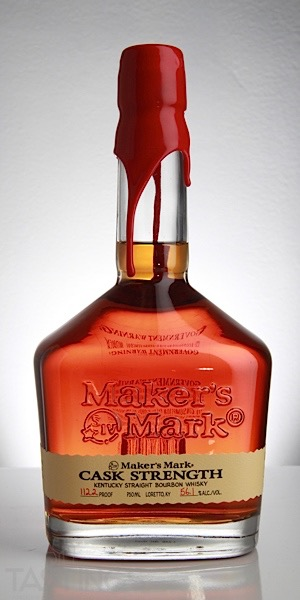

In [23]:

Image(df.iloc[6000].Photo_Link, width=127)

In [17]:
df.drop_duplicates(subset='Name', inplace=True)

df = df[df['Name'].notna()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8319 entries, 0 to 10521
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8319 non-null   object
 1   Photo_Link  7304 non-null   object
dtypes: object(2)
memory usage: 195.0+ KB


In [19]:
df.to_csv('photos_links.csv')

In [26]:
df_main = pd.read_csv('../data/cleaned_reviews_data.csv', index_col=0)
df_main.tail()

,Name,Description,Category,Country,Alcohol_Vol,Review,Style,Aroma,Flavor,Sweetness,...,Points,Price,Points_Ranking,Price_Range,Extend_Review,Photo_Link,Medal,Bands,Medal_Rank,Bands_Rank
8314,Angry Orchard Super Natural Cider USA Cider,Angry Orchard Review Super Natural Cider MA Ma...,Specialty Cider,USA,7.60%,Straw green color. Aromas of apple cider vineg...,Funky,"apple cider vinegar, new sneakers, and mango pits",wild lemon and grapefruit pith,Dry,...,NaN,NaN,NaN,NaN,Specialty ciders include all ciders that do no...,https://www.tastings.com/images-BTI/Glasses/Wi...,Bronze Medal,Recommended,2.0,2.0
8315,Avid Cider Co Apricot Cider USA Cider,Avid Cider Review Apricot Cider OR Oregon USA ...,Fruit Cider,USA,6.20%,"Light gold color. Aromas of orange creamsicle,...",Sweet & Fruity & Funky,"orange creamsicle, apple juice, melons in crea...",yogurt with apple cereal,Fruity,...,NaN,NaN,NaN,NaN,This category contains all non-apple based cid...,https://www.tastings.com/images-BTI/Glasses/Wi...,Bronze Medal,Recommended,2.0,2.0
8316,Magnotta Craft Ciders Apple Flavored Cider Can...,Magnotta Craft Ciders Review Apple Flavored Ci...,Common Cider,Canada,5.60%,"Silvery straw color. Aromas of pinot grigio, p...",Crisp & Light & Sweet & Fruity,"pinot grigio, pear slices, nougat, and brown rice",fondant and diced apples in powdered sugar,Very Sweet,...,NaN,NaN,NaN,NaN,Common ciders range in alcohol from 4-8% and t...,https://www.tastings.com/images-BTI/Glasses/Wi...,Bronze Medal,Recommended,2.0,2.0
8317,Topa Brut Artisanal Cidre France Cider,Topa Review Brut Artisanal Cidre France French...,French Cider,France,5.50%,Gold color. Aromas and flavors of frosted cere...,Crisp & Light & Funky,"frosted cereal, raisins in a cardboard box, si...",Same as aromas with notes of apple soufflé,Dryish,...,NaN,NaN,NaN,NaN,French-style ciders range in alcohol from 3-10...,https://www.tastings.com/images-BTI/Glasses/Wi...,Bronze Medal,Recommended,2.0,2.0
8318,Angry Orchard Strawman Farmhouse Hard Cider US...,Angry Orchard Review Strawman Farmhouse Hard C...,French Cider,USA,10%,Hazy bronze color. Aromas of green apple candy...,Funky,"green apple candy, butterscotch, permanent mar...","tingling, relaxed",Bitter,...,NaN,NaN,NaN,NaN,French-style ciders range in alcohol from 3-10...,https://www.tastings.com/images-BTI/Glasses/Wi...,Bronze Medal,Recommended,2.0,2.0


In [29]:
df_photo_links = pd.read_csv('../data/photos_links.csv', index_col=0)
df_photo_links.tail()

,Name,Photo_Link_2
10517,Angry Orchard Super Natural Cider USA Cider Re...,https://www.tastings.com/Product-Images/Beer/2...
10518,Avid Cider Co Apricot Cider USA Cider Review |...,https://www.tastings.com/Product-Images/Beer/2...
10519,Magnotta Craft Ciders Apple Flavored Cider Can...,https://www.tastings.com/Product-Images/Beer/2...
10520,Topa Brut Artisanal Cidre France Cider Review ...,https://www.tastings.com/Product-Images/Beer/2...
10521,Angry Orchard Strawman Farmhouse Hard Cider US...,https://www.tastings.com/Product-Images/Beer/2...


In [43]:
for i in range(len(df)):
    
    try:
        df['Name'][i] = df['Name'][i].split(' Review')[0]
    except:
        pass
    
df.shape

(10522, 2)

In [45]:
df.drop_duplicates(subset='Name', inplace=True)

df = df[df['Name'].notna()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8319 entries, 0 to 10521
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8319 non-null   object
 1   Photo_Link  7304 non-null   object
dtypes: object(2)
memory usage: 195.0+ KB


In [47]:
df.tail()

,Name,Photo_Link
10517,Angry Orchard Super Natural Cider USA Cider,https://www.tastings.com/Product-Images/Beer/2...
10518,Avid Cider Co Apricot Cider USA Cider,https://www.tastings.com/Product-Images/Beer/2...
10519,Magnotta Craft Ciders Apple Flavored Cider Can...,https://www.tastings.com/Product-Images/Beer/2...
10520,Topa Brut Artisanal Cidre France Cider,https://www.tastings.com/Product-Images/Beer/2...
10521,Angry Orchard Strawman Farmhouse Hard Cider US...,https://www.tastings.com/Product-Images/Beer/2...


In [48]:
df.rename(columns={'Photo_Link': 'Photo_Link_2'}, inplace=True)
df.tail()

,Name,Photo_Link_2
10517,Angry Orchard Super Natural Cider USA Cider,https://www.tastings.com/Product-Images/Beer/2...
10518,Avid Cider Co Apricot Cider USA Cider,https://www.tastings.com/Product-Images/Beer/2...
10519,Magnotta Craft Ciders Apple Flavored Cider Can...,https://www.tastings.com/Product-Images/Beer/2...
10520,Topa Brut Artisanal Cidre France Cider,https://www.tastings.com/Product-Images/Beer/2...
10521,Angry Orchard Strawman Farmhouse Hard Cider US...,https://www.tastings.com/Product-Images/Beer/2...


In [50]:
df_clean = df_main.merge(df, on='Name')


In [53]:
df_clean.Price_Range.value_counts()

Cheap        3184
Medium       3016
Expensive     354
Name: Price_Range, dtype: int64

In [56]:
df_clean.Price_Range[1]

'Expensive'

In [57]:
for i in range(len(df_clean)):
    
    if df_clean.Price_Range[i] == 'Medium':
        df_clean.Price_Range[i] = 'Mid Range'
    else:
        pass
    
df_clean.Price_Range.value_counts()

Cheap        3184
Mid Range    3016
Expensive     354
Name: Price_Range, dtype: int64

In [58]:
df_clean.to_csv('cleaned_data.csv')

### Cocktails DB

In [104]:
ct_df1 = pd.read_csv('../data/all_drinks_cocktailDB.csv', index_col=0)
ct_df1.shape

(546, 40)

In [73]:
ct_df2 = pd.read_csv('../data/hotaling_cocktails - Cocktails.csv', index_col=0)
ct_df2.shape

(687, 8)

In [125]:
ct_df3 = pd.read_csv('../data/mr-boston-flattened.csv')
ct_df3.shape

(990, 17)

In [72]:
ct_df1.head()

,strDrink,dateModified,idDrink,strAlcoholic,strCategory,strDrinkThumb,strGlass,strIBA,strIngredient1,strIngredient10,...,strMeasure15,strMeasure2,strMeasure3,strMeasure4,strMeasure5,strMeasure6,strMeasure7,strMeasure8,strMeasure9,strVideo
0,'57 Chevy with a White License Plate,7/18/2016 22:49,14029,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Highball glass,NaN,Creme de Cacao,NaN,...,NaN,1 oz,,,,,,NaN,NaN,NaN
1,1-900-FUK-MEUP,7/18/2016 22:27,15395,Alcoholic,Shot,http://www.thecocktaildb.com/images/media/drin...,Old-fashioned glass,NaN,Absolut Kurant,NaN,...,NaN,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/2 oz,1/4 oz,,NaN
2,110 in the shade,2/3/2016 14:51,15423,Alcoholic,Beer,http://www.thecocktaildb.com/images/media/drin...,Beer Glass,NaN,Lager,NaN,...,NaN,1.5 oz,,,,,,NaN,NaN,NaN
3,151 Florida Bushwacker,7/18/2016 22:28,14588,Alcoholic,Milk / Float / Shake,http://www.thecocktaildb.com/images/media/drin...,Beer mug,NaN,Malibu rum,NaN,...,NaN,1/2 oz,1/2 oz Bacardi,1 oz,1 oz,3 oz,1 oz,1 cup,,NaN
4,155 Belmont,10/5/2016 12:36,15346,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,White wine glass,NaN,Dark rum,NaN,...,NaN,2 shots,1 shot,1 shot,,,,,,NaN


In [105]:
ct_df1['Name'] = ct_df1.strDrink
ct_df1['Category'] = ct_df1.strCategory
ct_df1['Photo_Link'] = ct_df1.strDrinkThumb
ct_df1['Serve_In'] = ct_df1.strGlass
ct_df1['Instructions'] = ct_df1.strInstructions

In [106]:
ct_df1.head()

,strDrink,dateModified,idDrink,strAlcoholic,strCategory,strDrinkThumb,strGlass,strIBA,strIngredient1,strIngredient10,...,strMeasure6,strMeasure7,strMeasure8,strMeasure9,strVideo,Name,Category,Photo_Link,Serve_In,Instructions
0,'57 Chevy with a White License Plate,7/18/2016 22:49,14029,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Highball glass,NaN,Creme de Cacao,NaN,...,,,NaN,NaN,NaN,'57 Chevy with a White License Plate,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Highball glass,1. Fill a rocks glass with ice 2.add white cre...
1,1-900-FUK-MEUP,7/18/2016 22:27,15395,Alcoholic,Shot,http://www.thecocktaildb.com/images/media/drin...,Old-fashioned glass,NaN,Absolut Kurant,NaN,...,1/4 oz,1/2 oz,1/4 oz,,NaN,1-900-FUK-MEUP,Shot,http://www.thecocktaildb.com/images/media/drin...,Old-fashioned glass,Shake ingredients in a mixing tin filled with ...
2,110 in the shade,2/3/2016 14:51,15423,Alcoholic,Beer,http://www.thecocktaildb.com/images/media/drin...,Beer Glass,NaN,Lager,NaN,...,,,NaN,NaN,NaN,110 in the shade,Beer,http://www.thecocktaildb.com/images/media/drin...,Beer Glass,Drop shooter in glass. Fill with beer
3,151 Florida Bushwacker,7/18/2016 22:28,14588,Alcoholic,Milk / Float / Shake,http://www.thecocktaildb.com/images/media/drin...,Beer mug,NaN,Malibu rum,NaN,...,3 oz,1 oz,1 cup,,NaN,151 Florida Bushwacker,Milk / Float / Shake,http://www.thecocktaildb.com/images/media/drin...,Beer mug,Combine all ingredients. Blend until smooth. G...
4,155 Belmont,10/5/2016 12:36,15346,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,White wine glass,NaN,Dark rum,NaN,...,,,,,NaN,155 Belmont,Cocktail,http://www.thecocktaildb.com/images/media/drin...,White wine glass,Blend with ice. Serve in a wine glass. Garnish...


In [107]:
ct_df1 = ct_df1[['Name', 'Category', 'Instructions', 'Serve_In', 'Photo_Link']]

In [108]:
ct_df1

,Name,Category,Instructions,Serve_In,Photo_Link
0,'57 Chevy with a White License Plate,Cocktail,1. Fill a rocks glass with ice 2.add white cre...,Highball glass,http://www.thecocktaildb.com/images/media/drin...
1,1-900-FUK-MEUP,Shot,Shake ingredients in a mixing tin filled with ...,Old-fashioned glass,http://www.thecocktaildb.com/images/media/drin...
2,110 in the shade,Beer,Drop shooter in glass. Fill with beer,Beer Glass,http://www.thecocktaildb.com/images/media/drin...
3,151 Florida Bushwacker,Milk / Float / Shake,Combine all ingredients. Blend until smooth. G...,Beer mug,http://www.thecocktaildb.com/images/media/drin...
4,155 Belmont,Cocktail,Blend with ice. Serve in a wine glass. Garnish...,White wine glass,http://www.thecocktaildb.com/images/media/drin...
...,...,...,...,...,...
541,Zippy's Revenge,Cocktail,Mix Kool-Aid to taste then add Rum and ammaret...,Old-fashioned glass,http://www.thecocktaildb.com/images/media/drin...
542,Zizi Coin-coin,Punch / Party Drink,"Pour 5cl of Cointreau on ice, add 2cl of fresh...",Margarita/Coupette glass,http://www.thecocktaildb.com/images/media/drin...
543,Zoksel,Soft Drink / Soda,"No specific mixinginstructions, just poor ever...",Beer pilsner,http://www.thecocktaildb.com/images/media/drin...
544,Zorbatini,Cocktail,Prepare like a Martini. Garnish with a green o...,Cocktail glass,http://www.thecocktaildb.com/images/media/drin...


In [90]:
ct_df_1_ing = pd.read_csv('../data/cocktails_db.csv')
ct_df_1_ing.head()

,Cocktail Name,Ingredients,Preparation
0,155 Belmont,"Orange juice, Vodka, Light rum, Dark rum,",Blend with ice. Serve in a wine glass. Garnish...
1,1-900-FUK-MEUP,"Pineapple juice, Cranberry juice, Amaretto, Ma...",Shake ingredients in a mixing tin filled with ...
2,110 in the shade,"Tequila, Lager,",Drop shooter in glass. Fill with beer
3,151 Florida Bushwacker,"Vanilla ice-cream, Coconut liqueur, Milk, Coin...",Combine all ingredients. Blend until smooth. G...
4,252,"Wild Turkey, 151 proof rum,","Add both ingredients to shot glass, shoot, and..."


In [93]:
ct_df_1_ing['Name'] = ct_df_1_ing['Cocktail Name']

In [95]:
ct_df_1_ing = ct_df_1_ing[['Name', 'Ingredients']]

In [96]:
ct_df_1_ing

,Name,Ingredients
0,155 Belmont,"Orange juice, Vodka, Light rum, Dark rum,"
1,1-900-FUK-MEUP,"Pineapple juice, Cranberry juice, Amaretto, Ma..."
2,110 in the shade,"Tequila, Lager,"
3,151 Florida Bushwacker,"Vanilla ice-cream, Coconut liqueur, Milk, Coin..."
4,252,"Wild Turkey, 151 proof rum,"
...,...,...
377,Zippy's Revenge,"Kool-Aid, Rum, Amaretto,"
378,Zimadori Zinger,"Zima, Midori melon liqueur,"
379,Ziemes Martini Apfelsaft,"Apple juice, Vermouth,"
380,'57 Chevy with a White License Plate,"Vodka, Creme de Cacao,"


In [109]:
ct_df1 = ct_df1.merge(ct_df_1_ing, how='outer', on='Name')

In [110]:
ct_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 589
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          590 non-null    object
 1   Category      546 non-null    object
 2   Instructions  545 non-null    object
 3   Serve_In      546 non-null    object
 4   Photo_Link    546 non-null    object
 5   Ingredients   382 non-null    object
dtypes: object(6)
memory usage: 32.3+ KB


In [112]:
ct_df1.head()

,Name,Category,Instructions,Serve_In,Photo_Link,Ingredients
0,'57 Chevy with a White License Plate,Cocktail,1. Fill a rocks glass with ice 2.add white cre...,Highball glass,http://www.thecocktaildb.com/images/media/drin...,"Vodka, Creme de Cacao,"
1,1-900-FUK-MEUP,Shot,Shake ingredients in a mixing tin filled with ...,Old-fashioned glass,http://www.thecocktaildb.com/images/media/drin...,"Pineapple juice, Cranberry juice, Amaretto, Ma..."
2,110 in the shade,Beer,Drop shooter in glass. Fill with beer,Beer Glass,http://www.thecocktaildb.com/images/media/drin...,"Tequila, Lager,"
3,151 Florida Bushwacker,Milk / Float / Shake,Combine all ingredients. Blend until smooth. G...,Beer mug,http://www.thecocktaildb.com/images/media/drin...,"Vanilla ice-cream, Coconut liqueur, Milk, Coin..."
4,155 Belmont,Cocktail,Blend with ice. Serve in a wine glass. Garnish...,White wine glass,http://www.thecocktaildb.com/images/media/drin...,"Orange juice, Vodka, Light rum, Dark rum,"


In [101]:
ct_df2 = pd.read_csv('../data/hotaling_cocktails - Cocktails.csv')
print(ct_df2.shape)
ct_df2.head()

(687, 9)


,Cocktail Name,Bartender,Bar/Company,Location,Ingredients,Garnish,Glassware,Preparation,Notes
0,Flor de Amaras,Kelly McCarthy,NaN,Boston,"1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...",Marigold Petals,NaN,*Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...,NaN
1,The Happy Place,Elizabeth Montana,Forgery & Verso,San Francisco,"2 oz Junipero Gin, .75 oz House-made Cranberry...","Dehydrated Lemon Wheel, Sprig of Rosemary",NaN,*House-made Cranberry syrup: \n-- 2 cups Fresh...,Junipero Gin 20th Anniversary Signature Cocktail
2,Bon Voyage Pisco Punch,Jon Morales,NaN,San Francisco,"1500 ml BarSol Selecto Italia Pisco, 750 ml Le...",NaN,Punch Bowl,*Pineapple Gomme: \nMix equal parts (1.5 cups)...,NaN
3,Still Life of a Pineapple,Daniel Braganca,Backbar,Somerville,"1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...",NaN,NaN,*Pineapple Syrup:\n<em>Equal parts pineapple b...,NaN
4,The Bittered Valley,Nik Virrey,NaN,Seattle,"1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...",NaN,NaN,"1st glass ingredients:\nLuxardo Maraschino, Ac...",NaN


In [111]:
ct_df2['Name'] = ct_df2['Cocktail Name']
ct_df2['Instructions'] = ct_df2['Preparation']
ct_df2['Serve_In'] = ct_df2.Glassware

ct_df2 = ct_df2[['Name', 'Instructions', 'Serve_In', 'Ingredients']]

ct_df2.head()

,Name,Instructions,Serve_In,Ingredients
0,Flor de Amaras,*Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...,NaN,"1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5..."
1,The Happy Place,*House-made Cranberry syrup: \n-- 2 cups Fresh...,NaN,"2 oz Junipero Gin, .75 oz House-made Cranberry..."
2,Bon Voyage Pisco Punch,*Pineapple Gomme: \nMix equal parts (1.5 cups)...,Punch Bowl,"1500 ml BarSol Selecto Italia Pisco, 750 ml Le..."
3,Still Life of a Pineapple,*Pineapple Syrup:\n<em>Equal parts pineapple b...,NaN,"1.5 oz BarSol Primero Quebranta Pisco, .75 oz ..."
4,The Bittered Valley,"1st glass ingredients:\nLuxardo Maraschino, Ac...",NaN,"1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac..."


In [123]:
ct2_cleaned = pd.concat([ct_df1, ct_df2], axis=0).reset_index().drop(columns='index')

In [132]:
ct2_cleaned.Photo_Link[520]

'http://www.thecocktaildb.com/images/media/drink/lmj2yt1504820500.jpg'

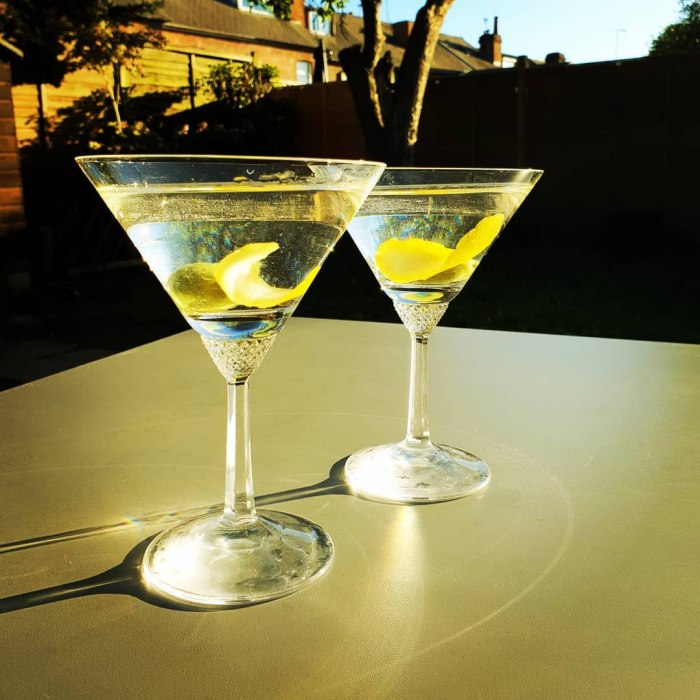

In [146]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
Image('https://www.thecocktaildb.com/images/media/drink/6ck9yi1589574317.jpg', width=300, height=300)

In [147]:
ct2_cleaned.to_csv('cocktails_full.csv')

In [126]:
ct_df3.head()

,name,category,measurement-1,ingredient-1,measurement-2,ingredient-2,measurement-3,ingredient-3,measurement-4,ingredient-4,measurement-5,ingredient-5,measurement-6,ingredient-6,instructions,glass,glass-size
0,Gauguin,Cocktail Classics,2 oz,Light Rum,1 oz,Passion Fruit Syrup,1 oz,Lemon Juice,1 oz,Lime Juice,NaN,NaN,NaN,NaN,Combine ingredients with a cup of crushed ice ...,Old-Fashioned Glass,6 to 8 ounces
1,Fort Lauderdale,Cocktail Classics,1 1/2 oz,Light Rum,1/2 oz,Sweet Vermouth,1/4 oz,Juice of Orange,1/4 oz,Juice of a Lime,NaN,NaN,NaN,NaN,Shake with ice and strain into old-fashioned g...,Old-Fashioned Glass,6 to 8 ounces
2,Apple Pie,Cordials and Liqueurs,3 oz,Apple schnapps,1 oz,Cinnamon schnapps,NaN,Apple slice,NaN,NaN,NaN,NaN,NaN,NaN,Pour into ice-filled old-fashioned glass. Garn...,Old-Fashioned Glass,6 to 8 ounces
3,Cuban Cocktail No. 1,Cocktail Classics,1/2 oz,Juice of a Lime,1/2 oz,Powdered Sugar,2 oz,Light Rum,NaN,NaN,NaN,NaN,NaN,NaN,Shake with ice and strain into cocktail glass.,Cocktail Glass,6 or more ounces
4,Cool Carlos,Cocktail Classics,1 1/2 oz,Dark rum,2 oz,Cranberry Juice,2 oz,Pineapple Juice,1 oz,Orange curacao,1 oz,Sour Mix,NaN,NaN,"Mix all ingredients except curacao with ice, s...",Collins Glass,14 to 16 ounces


In [2]:
cocktails_full = pd.read_csv('../data/cocktails_full.csv', index_col=0)
print(cocktails_full.shape)

(1277, 6)


In [3]:
cocktails_full.head()

,Name,Category,Instructions,Serve_In,Photo_Link,Ingredients
0,'57 Chevy with a White License Plate,Cocktail,1. Fill a rocks glass with ice 2.add white cre...,Highball glass,http://www.thecocktaildb.com/images/media/drin...,"Vodka, Creme de Cacao,"
1,1-900-FUK-MEUP,Shot,Shake ingredients in a mixing tin filled with ...,Old-fashioned glass,http://www.thecocktaildb.com/images/media/drin...,"Pineapple juice, Cranberry juice, Amaretto, Ma..."
2,110 in the shade,Beer,Drop shooter in glass. Fill with beer,Beer Glass,http://www.thecocktaildb.com/images/media/drin...,"Tequila, Lager,"
3,151 Florida Bushwacker,Milk / Float / Shake,Combine all ingredients. Blend until smooth. G...,Beer mug,http://www.thecocktaildb.com/images/media/drin...,"Vanilla ice-cream, Coconut liqueur, Milk, Coin..."
4,155 Belmont,Cocktail,Blend with ice. Serve in a wine glass. Garnish...,White wine glass,http://www.thecocktaildb.com/images/media/drin...,"Orange juice, Vodka, Light rum, Dark rum,"


In [5]:
cocktails_full.tail()

,Name,Category,Instructions,Serve_In,Photo_Link,Ingredients
1272,The Negroni Bianco,NaN,NaN,NaN,NaN,"1.5 oz Luxardo Bitter Bianco, .75 oz Tempus Fu..."
1273,Match Grip Julep,NaN,NaN,NaN,NaN,"1.5 oz H by HINE, .5 oz Jamaican Rum, 1 tsp Ca..."
1274,The Dry Cruise,NaN,NaN,NaN,NaN,"1 oz Luxardo Bitter Bianco, 1 oz Lustau Oloros..."
1275,Red Hook,NaN,NaN,NaN,NaN,"2 oz Rye Whiskey, 5 oz Punt e Mes, .5 oz Luxar..."
1276,Union Jack,NaN,NaN,NaN,NaN,".75 oz Luxardo Maraschino Liqueur, .75 oz Gree..."


In [4]:
cocktails_full.tail().Ingredients.iloc[0]

'1.5 oz Luxardo Bitter Bianco, .75 oz Tempus Fugit Alessio Vermouth Bianco, 1.5 oz Junipero Gin'

In [10]:
cocktails_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          1277 non-null   object
 1   Category      546 non-null    object
 2   Instructions  1187 non-null   object
 3   Serve_In      1031 non-null   object
 4   Photo_Link    546 non-null    object
 5   Ingredients   1069 non-null   object
dtypes: object(6)
memory usage: 69.8+ KB


In [6]:
more_cocktails = pd.read_csv('../data/more_cocktails.csv', index_col=0)
more_cocktails.head()

,Name,Instructions,Photo_Link,Ingredients,Description
0,Bay Breeze,Fill a highball glass with ice. Add all ingred...,https://www.liquor.com/thmb/rCEUg-S6BL8_seDH0G...,"1 1/2 ounces vodka, 3 ounces cranberry juice, ...",A close relative of both the vodka-cranberry C...
1,Chocolate Martini,Add a small amount of chocolate liqueur into a...,https://www.liquor.com/thmb/uTjq-gcAdyyCdsZQUD...,"Cocoa powder, to rim glass, 1 ounce chocolate ...",Another member of the Martini-in-name-only fam...
2,Pom-Blood-Orange Old Fashioned,"Add the blood orange peels, pomegranate arils,...",https://www.liquor.com/thmb/po01t2npfCKtN6UINJ...,"2 lengths of blood orange peel, 1 teaspoon pom...","From bartender Nick Mautone, who also created ..."
3,Miss Elena,Add all ingredients into a shaker with ice and...,https://www.liquor.com/thmb/-BS8Z_gfMBZx1XuIna...,"1 1/4 ounces Belvedere vodka, 3/4 ounce Mr Bla...","Beau Bradley, the head bartender at Michelin-s..."
4,A Figgin’ Good Time,Add all ingredients into a shaker with ice and...,https://www.liquor.com/thmb/4dXdrZ2BwJRTUJtrij...,"2 ounces New Amsterdam vodka, 1 1/2 ounces esp...",Coffee’s bold and bitter character has made it...


In [7]:
more_cocktails.sample(1)

,Name,Instructions,Photo_Link,Ingredients,Description
172,Presbyterian,Add the scotch into a highball or Collins glas...,https://www.liquor.com/thmb/6ihlBY1hN3173TYCja...,"2 ounces scotch, bourbon or rye, 2 to 3 ounces...","If you treat whisk(e)y like a religion, a clas..."


In [14]:
more_cocktails.sample(1).Photo_Link.values[0]

'https://www.liquor.com/thmb/86n4O9QMFLxeEZX17nq_wQa5YVo=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/__opt__aboutcom__coeus__resources__content_migration__liquor__2020__01__21103624__Bear-With-Me-Honey-at-A-Rakes-Progress-courtesy-of-Sydell-Group_article_720x720-85ab120897cb43b89a68c49299f4a6a0.jpg'

In [18]:
more_cocktails.sample(1).Instructions.values[0]

'Add the rum and batter into a mug. Fill with boiling water and stir. Garnish with freshly grated nutmeg and a cinnamon stick. *Hot buttered rum batter: In a large mixing bowl, add 1 pound softened butter, 1 pound brown sugar, 1 pound white sugar, 1 tablespoon ground cinnamon and 1 teaspoon each ground clove and ground nutmeg. Stir to combine, then add 1 quart of lightly softened vanilla ice cream and stir again. Transfer to a container with a lid, seal and store in the freezer. '

In [19]:
more_cocktails.sample(1).Description.values[0]

'Sambuca, the Italian anise-flavored liqueur, is a love-it-or-hate-it spirit. This cocktail, however, may serve to turn haters into fans. “Anise can be polarizing, but pairing it with flavor profiles that play well together can turn a niche spirit into a crowd pleaser,” says Josh Daws, the bar manager at Frannie & The Fox in Hotel Emeline in Charleston, South Carolina. He feels the liqueur works well with citrus, spice and earthy flavors, as in this cocktail, which he calls a “citrusy, earthy, vegan riff on an egg white sour.” The effervescence of Topo Chico poured through the center of the glass gives the drink a foamy lifted head reminiscent of a Ramos Gin Fizz. '

In [20]:
more_cocktails.sample(1).Ingredients.values[0]

'2 oz Blended scotch (such as Chivas), 1 oz Sweet vermouth (such as Dolin or Martini & Rossi), 2 dashes Regans’ Orange Bitters No. 6, Garnish: Lemon peel, '

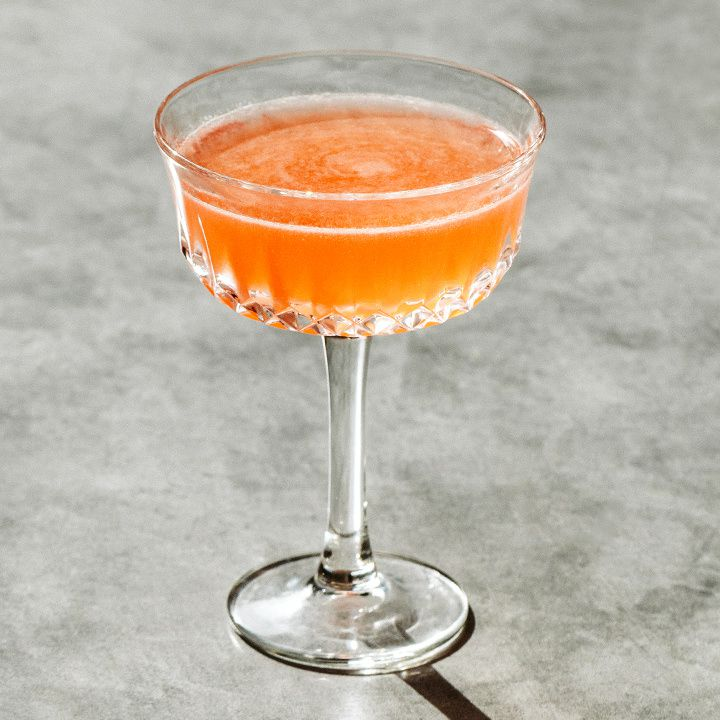

In [17]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
Image(more_cocktails.sample(1).Photo_Link.values[0], width=300, height=300)

In [27]:
full_cocktails = pd.concat([cocktails_full, more_cocktails]).drop_duplicates(subset='Name')

In [28]:
full_cocktails.to_csv('full_cocktails.csv')

In [29]:
full_cocktails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 367
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          1545 non-null   object
 1   Category      546 non-null    object
 2   Instructions  1407 non-null   object
 3   Serve_In      1013 non-null   object
 4   Photo_Link    839 non-null    object
 5   Ingredients   1287 non-null   object
 6   Description   243 non-null    object
dtypes: object(7)
memory usage: 96.6+ KB


### More beer - liquor

In [2]:
path = r'C:/Metis_Bootcamp/Cocktails_recommendation_NLP/data/more_beer/' # data path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    data = pd.read_csv(filename, index_col=0, header=0)
    li.append(data)

df = pd.concat(li, axis=0, ignore_index=True)

print(df.shape)

df.head()

(2400, 6)


,Name,Description,Country,Aroma,Flavor,Photo_Link
0,Judge's Review: 90 Rating - Li'l Luci by Churc...,Li'l Luci by Church Street Brewing Co. was eva...,United States,22 / 24,37 / 40,https://beerconnoisseur.com/sites/default/file...
1,Judge’s Review: 95 Rating - Llama Mama by Darw...,Llama Mama by Darwin Brewing Co. is being eval...,United States,23 / 24,38 / 40,https://beerconnoisseur.com/sites/default/file...
2,Judge’s Review: 70 Rating - Circa 1926 by Darw...,Circa 1926 by Darwin Brewing Co. is being eval...,United States,19 / 24,30 / 40,https://beerconnoisseur.com/sites/default/file...
3,Judge's Review: 87 Rating - Wooden Helix Tripl...,Wooden Helix Triple IPA by Wild Leap Brew Co. ...,United States,21 / 24,35 / 40,https://beerconnoisseur.com/sites/default/file...
4,Judge's Review: 87 Rating - Reel Hazy by Cryst...,Reel Hazy by Crystal Lake Brewing is a New Eng...,United States,21 / 24,36 / 40,https://beerconnoisseur.com/sites/default/file...


In [5]:
more_liquor = pd.read_csv('../data/more_liquors.csv', index_col=0)
more_liquor.head()

,Name,Description,Photo_Link,Price
0,Crown Royal Peach Whisky,"To create this extraordinary blend, crown roya...",//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,$44.99\n$69.99
1,Buffalo Trace Bourbon,\n\n\nKENTUCKY STRAIGHT BOURBON WHISKEY\n\n\n\...,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,$22.99
2,Crown Royal Maple Whisky,An exceptionally smooth whisky that masterfull...,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,$99.99
3,Howler Head Banana Infused Kentucky Straight B...,Howler Head Banana Infused Kentucky Straight B...,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,$21.99
4,Willett Pot Still Reserve,"For the Willett family, distilling craft whisk...",//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,$59.99\n$74.99


In [22]:
more_liquor['Price'] = more_liquor['Price'].apply(lambda x: x.split('\n')[0].split('$')[1].strip())

In [26]:
more_liquor['Description'] = more_liquor['Description'].apply(lambda x: x.strip())
more_liquor.head()

,Name,Description,Photo_Link,Price
0,Crown Royal Peach Whisky,"To create this extraordinary blend, crown roya...",//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,44.99
1,Buffalo Trace Bourbon,KENTUCKY STRAIGHT BOURBON WHISKEY\n\n\n\n\nBuf...,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,22.99
2,Crown Royal Maple Whisky,An exceptionally smooth whisky that masterfull...,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,99.99
3,Howler Head Banana Infused Kentucky Straight B...,Howler Head Banana Infused Kentucky Straight B...,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,21.99
4,Willett Pot Still Reserve,"For the Willett family, distilling craft whisk...",//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,59.99


In [36]:
more_liquor['Price']  = pd.to_numeric(more_liquor['Price'] , errors='coerce').fillna(0).astype(np.int64)

In [41]:
for _ in range(len(more_liquor)):
    if more_liquor.Price[_] == 0:
        more_liquor.Price[_] = np.nan
    else:
        pass

In [43]:
more_liquor['Price_Range'] = np.nan
for i in range(len(more_liquor)):
    
    if more_liquor.Price[i] > 70:
        more_liquor['Price_Range'][i] = 'Expensive'
    
    elif more_liquor.Price[i] >= 20:
        more_liquor['Price_Range'][i] = 'Medium'
        
    elif more_liquor.Price[i] < 20:
        more_liquor['Price_Range'][i] = 'Cheap'
        
    else:
        pass

In [47]:
more_liquor.shape

(1059, 5)

In [63]:
df.head()

,Name,Description,Country,Aroma,Flavor,Photo_Link
0,Judge's Review: 90 Rating - Li'l Luci by Churc...,Li'l Luci by Church Street Brewing Co. was eva...,United States,22 / 24,37 / 40,https://beerconnoisseur.com/sites/default/file...
1,Judge’s Review: 95 Rating - Llama Mama by Darw...,Llama Mama by Darwin Brewing Co. is being eval...,United States,23 / 24,38 / 40,https://beerconnoisseur.com/sites/default/file...
2,Judge’s Review: 70 Rating - Circa 1926 by Darw...,Circa 1926 by Darwin Brewing Co. is being eval...,United States,19 / 24,30 / 40,https://beerconnoisseur.com/sites/default/file...
3,Judge's Review: 87 Rating - Wooden Helix Tripl...,Wooden Helix Triple IPA by Wild Leap Brew Co. ...,United States,21 / 24,35 / 40,https://beerconnoisseur.com/sites/default/file...
4,Judge's Review: 87 Rating - Reel Hazy by Cryst...,Reel Hazy by Crystal Lake Brewing is a New Eng...,United States,21 / 24,36 / 40,https://beerconnoisseur.com/sites/default/file...


In [62]:
df.Name.iloc[-1].split('Rating - ')[-1]

'Oberon Ale'

In [64]:
df['Name'] = df['Name'].apply(lambda x: x.split('Rating - ')[-1])

In [74]:
df.Description.sample(5)

1343    Complex and unusual aroma of dark moist German...
2108    The beer starts out with a fresh, tart raspber...
98      New Wave by Pontoon Brewing is a blonde ale an...
1630    Some dark malt character (subtle roast, some b...
1329    With a moderately high fresh floral, fruity ho...
Name: Description, dtype: object

In [75]:
df

,Name,Description,Country,Aroma,Flavor,Photo_Link
0,Li'l Luci by Church Street Brewing Co.,Li'l Luci by Church Street Brewing Co. was eva...,United States,22 / 24,37 / 40,https://beerconnoisseur.com/sites/default/file...
1,Llama Mama by Darwin Brewing Co.,Llama Mama by Darwin Brewing Co. is being eval...,United States,23 / 24,38 / 40,https://beerconnoisseur.com/sites/default/file...
2,Circa 1926 by Darwin Brewing Co.,Circa 1926 by Darwin Brewing Co. is being eval...,United States,19 / 24,30 / 40,https://beerconnoisseur.com/sites/default/file...
3,Wooden Helix Triple IPA by Wild Leap Brew Co.,Wooden Helix Triple IPA by Wild Leap Brew Co. ...,United States,21 / 24,35 / 40,https://beerconnoisseur.com/sites/default/file...
4,Reel Hazy by Crystal Lake Brewing,Reel Hazy by Crystal Lake Brewing is a New Eng...,United States,21 / 24,36 / 40,https://beerconnoisseur.com/sites/default/file...
...,...,...,...,...,...,...
2395,Hefe-Weissbier,Though it is unclear precisely when Weihenstep...,Germany,24 / 24,39 / 40,https://beerconnoisseur.com/sites/default/file...
2396,Saison DuPont,"For more than a century and a half, Brasserie ...",Belgium,24 / 24,38 / 40,https://beerconnoisseur.com/sites/default/file...
2397,Hofbräu Hefe Weizen,"Hofbräuhaus, in Munich, is truly a “must see” ...",Germany,24 / 24,38 / 40,https://beerconnoisseur.com/sites/default/file...
2398,Cuvée Reneé,A classic example of what some consider the ol...,Belgium,24 / 24,39 / 40,https://beerconnoisseur.com/sites/default/file...


In [76]:
more_liquor

,Name,Description,Photo_Link,Price,Price_Range
0,Crown Royal Peach Whisky,"To create this extraordinary blend, crown roya...",//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,44.0,Medium
1,Buffalo Trace Bourbon,KENTUCKY STRAIGHT BOURBON WHISKEY\n\n\n\n\nBuf...,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,22.0,Medium
2,Crown Royal Maple Whisky,An exceptionally smooth whisky that masterfull...,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,99.0,Expensive
3,Howler Head Banana Infused Kentucky Straight B...,Howler Head Banana Infused Kentucky Straight B...,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,21.0,Medium
4,Willett Pot Still Reserve,"For the Willett family, distilling craft whisk...",//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,59.0,Medium
...,...,...,...,...,...
1054,Armand de Brignac Ace of Spades Blanc de Noirs...,Champagne Armand de Brignac Blanc de Noirs Ass...,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,949.0,Expensive
1055,Louis Roederer Cristal Rose,"In 1974, 100 years after the creation of Crist...",//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,679.0,Expensive
1056,Lamborghini: Torami Umbria Red With Gift Set,"Variety\n\n\nSangiovese, Cabernet Sauvignon\n\...",//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,79.0,Expensive
1057,Lamborghini: Centanni Grechetto Umbria White,Variety\n\n\n\nGrechetto\n\n\n\nGrowing method...,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...,39.0,Medium


In [79]:
more_beer_liquor = pd.concat([df, more_liquor]).reset_index()

In [83]:
more_beer_liquor.drop(columns='index', inplace=True)

In [85]:
more_beer_liquor['Review'] = more_beer_liquor['Description']

In [87]:
more_beer_liquor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         3459 non-null   object 
 1   Description  3456 non-null   object 
 2   Country      2388 non-null   object 
 3   Aroma        2397 non-null   object 
 4   Flavor       2397 non-null   object 
 5   Photo_Link   3447 non-null   object 
 6   Price        992 non-null    float64
 7   Price_Range  992 non-null    object 
 8   Review       3456 non-null   object 
dtypes: float64(1), object(8)
memory usage: 243.3+ KB


In [88]:
full_df = pd.read_csv('../data/cleaned_reviews_data.csv', index_col=0)
full_df.head()

,Name,Description,Category,Country,Alcohol_Vol,Review,Style,Aroma,Flavor,Sweetness,...,Price,Points_Ranking,Price_Range,Extend_Review,Photo_Link,Medal,Bands,Medal_Rank,Bands_Rank,Photo_Link_2
0,Mezcal de Leyendas Verde San Luis Potosi Mezca...,Mezcal de Leyendas Review Verde San Luis Potos...,Blanco Mezcal,Mexico,45%,"Clear color. Aromas and flavors of cucumber, m...","Fruity, Funky, Rich, Spicy, Smoky, Herbal & Co...","cucumber-melon, lime spritz, caramelized orang...","Same as aromas with notes of pickled ginger, s...",NaN,...,49.0,High,Mid Range,Blanco mezcal is a spirit from Mexico that can...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0,https://www.tastings.com/Product-Images/Spirit...
1,El Tesoro Paradiso Tequila Extra Anejo Mexico ...,El Tesoro Review Paradiso Tequila Extra Anejo ...,Extra Añejo Tequila,Mexico,40%,"Gold color. Inviting aromas of roasted nuts, c...","Fruity, Complex, Candied, Herbal, Rich & Spicy","roasted nuts, candied cherries, vanilla bean, ...","ripe melons, toffee, and white pepper",NaN,...,180.0,High,Expensive,An extra añejo tequila must be aged for at lea...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0,https://www.tastings.com/Product-Images/Spirit...
2,Peloton de la Muerte Vegan Pechuga Mezcal Mexi...,Peloton de la Muerte Review Vegan Pechuga Mezc...,Flavored Mezcal,Mexico,45.10%,Silvery straw color. Citrusy aromas and flavor...,"Complex, Fruity & Herbal","pickled melon and pineapple, candied jalapeño,...",Same as aromas with suggestions of curry,NaN,...,44.0,High,Mid Range,A Flavored Mezcal is an agave-based distillate...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0,https://www.tastings.com/Product-Images/Spirit...
3,El Tesoro Anejo Tequila Mexico Spirits,El Tesoro Review Anejo Tequila Mexico Mexican ...,Añejo Tequila,Mexico,40%,Straw color. Inviting aromas and flavors of ho...,"Fruity, Spicy & Herbal","honey-drizzled grapefruit, sweet apple compote...","Same as aromas with notes of pink peppercorns,...",NaN,...,85.0,High,Expensive,"Añejo (""old"") Tequila is aged in wooden barrel...",https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0,https://www.tastings.com/Product-Images/Spirit...
4,1800 Milenio Extra Anejo Tequila Mexico Spirits,1800 Review Milenio Extra Anejo Tequila Mexico...,Extra Añejo Tequila,Mexico,40%,"Amber color. Aromas of toffee coated popcorn, ...","Fruity, Rich & Spicy","toffee coated popcorn, peanuts, warm madeira c...","allspice, mint tea, candied ginger, honey, and...",NaN,...,250.0,High,Expensive,An extra añejo tequila must be aged for at lea...,https://www.tastings.com/images-BTI/Glasses/Sp...,Platinum Medal,Superlative,5.0,5.0,https://www.tastings.com/Product-Images/Spirit...


In [89]:
full_df.tail()

,Name,Description,Category,Country,Alcohol_Vol,Review,Style,Aroma,Flavor,Sweetness,...,Price,Points_Ranking,Price_Range,Extend_Review,Photo_Link,Medal,Bands,Medal_Rank,Bands_Rank,Photo_Link_2
8314,Angry Orchard Super Natural Cider USA Cider,Angry Orchard Review Super Natural Cider MA Ma...,Specialty Cider,USA,7.60%,Straw green color. Aromas of apple cider vineg...,Funky,"apple cider vinegar, new sneakers, and mango pits",wild lemon and grapefruit pith,Dry,...,NaN,NaN,NaN,Specialty ciders include all ciders that do no...,https://www.tastings.com/images-BTI/Glasses/Wi...,Bronze Medal,Recommended,2.0,2.0,https://www.tastings.com/Product-Images/Beer/2...
8315,Avid Cider Co Apricot Cider USA Cider,Avid Cider Review Apricot Cider OR Oregon USA ...,Fruit Cider,USA,6.20%,"Light gold color. Aromas of orange creamsicle,...",Sweet & Fruity & Funky,"orange creamsicle, apple juice, melons in crea...",yogurt with apple cereal,Fruity,...,NaN,NaN,NaN,This category contains all non-apple based cid...,https://www.tastings.com/images-BTI/Glasses/Wi...,Bronze Medal,Recommended,2.0,2.0,https://www.tastings.com/Product-Images/Beer/2...
8316,Magnotta Craft Ciders Apple Flavored Cider Can...,Magnotta Craft Ciders Review Apple Flavored Ci...,Common Cider,Canada,5.60%,"Silvery straw color. Aromas of pinot grigio, p...",Crisp & Light & Sweet & Fruity,"pinot grigio, pear slices, nougat, and brown rice",fondant and diced apples in powdered sugar,Very Sweet,...,NaN,NaN,NaN,Common ciders range in alcohol from 4-8% and t...,https://www.tastings.com/images-BTI/Glasses/Wi...,Bronze Medal,Recommended,2.0,2.0,https://www.tastings.com/Product-Images/Beer/2...
8317,Topa Brut Artisanal Cidre France Cider,Topa Review Brut Artisanal Cidre France French...,French Cider,France,5.50%,Gold color. Aromas and flavors of frosted cere...,Crisp & Light & Funky,"frosted cereal, raisins in a cardboard box, si...",Same as aromas with notes of apple soufflé,Dryish,...,NaN,NaN,NaN,French-style ciders range in alcohol from 3-10...,https://www.tastings.com/images-BTI/Glasses/Wi...,Bronze Medal,Recommended,2.0,2.0,https://www.tastings.com/Product-Images/Beer/2...
8318,Angry Orchard Strawman Farmhouse Hard Cider US...,Angry Orchard Review Strawman Farmhouse Hard C...,French Cider,USA,10%,Hazy bronze color. Aromas of green apple candy...,Funky,"green apple candy, butterscotch, permanent mar...","tingling, relaxed",Bitter,...,NaN,NaN,NaN,French-style ciders range in alcohol from 3-10...,https://www.tastings.com/images-BTI/Glasses/Wi...,Bronze Medal,Recommended,2.0,2.0,https://www.tastings.com/Product-Images/Beer/2...


In [101]:
more_beer_liquor.rename(columns={'Photo_Link': 'Photo_Link_2'} ,inplace=True)

In [102]:
extended_df = pd.concat([full_df, more_beer_liquor]).reset_index()

In [103]:
extended_df.drop(columns='index', inplace=True)

In [104]:
extended_df.tail()

,Name,Description,Category,Country,Alcohol_Vol,Review,Style,Aroma,Flavor,Sweetness,...,Price,Points_Ranking,Price_Range,Extend_Review,Photo_Link,Medal,Bands,Medal_Rank,Bands_Rank,Photo_Link_2
11773,Armand de Brignac Ace of Spades Blanc de Noirs...,Champagne Armand de Brignac Blanc de Noirs Ass...,NaN,NaN,NaN,Champagne Armand de Brignac Blanc de Noirs Ass...,NaN,NaN,NaN,NaN,...,949.0,NaN,Expensive,NaN,NaN,NaN,NaN,NaN,NaN,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...
11774,Louis Roederer Cristal Rose,"In 1974, 100 years after the creation of Crist...",NaN,NaN,NaN,"In 1974, 100 years after the creation of Crist...",NaN,NaN,NaN,NaN,...,679.0,NaN,Expensive,NaN,NaN,NaN,NaN,NaN,NaN,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...
11775,Lamborghini: Torami Umbria Red With Gift Set,"Variety\n\n\nSangiovese, Cabernet Sauvignon\n\...",NaN,NaN,NaN,"Variety\n\n\nSangiovese, Cabernet Sauvignon\n\...",NaN,NaN,NaN,NaN,...,79.0,NaN,Expensive,NaN,NaN,NaN,NaN,NaN,NaN,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...
11776,Lamborghini: Centanni Grechetto Umbria White,Variety\n\n\n\nGrechetto\n\n\n\nGrowing method...,NaN,NaN,NaN,Variety\n\n\n\nGrechetto\n\n\n\nGrowing method...,NaN,NaN,NaN,NaN,...,39.0,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...
11777,Caymus Vineyards Cabernet Sauvignon Magnum 1.5L,Our Cabernets are a blend of wines from eight ...,NaN,NaN,NaN,Our Cabernets are a blend of wines from eight ...,NaN,NaN,NaN,NaN,...,189.0,NaN,Expensive,NaN,NaN,NaN,NaN,NaN,NaN,//cdn.shopify.com/s/files/1/0287/8390/2817/pro...


In [105]:
extended_df.to_csv('extended_df.csv')

In [107]:
import pickle
with open('extended_df.pkl', 'wb') as wf:
    pickle.dump(extended_df, wf)

In [108]:
extended_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            11778 non-null  object 
 1   Description     11775 non-null  object 
 2   Category        7322 non-null   object 
 3   Country         9705 non-null   object 
 4   Alcohol_Vol     7322 non-null   object 
 5   Review          10778 non-null  object 
 6   Style           7286 non-null   object 
 7   Aroma           9700 non-null   object 
 8   Flavor          9698 non-null   object 
 9   Sweetness       5225 non-null   object 
 10  Bitterness      438 non-null    object 
 11  Enjoy           7303 non-null   object 
 12  Pairing         5509 non-null   object 
 13  Cocktails       1315 non-null   object 
 14  Bottom_Line     7322 non-null   object 
 15  Points          6224 non-null   float64
 16  Price           7546 non-null   float64
 17  Points_Ranking  6224 non-null  